# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Ades Tikaningsih
- Email:adestika123@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
#random forest
from sklearn.ensemble import RandomForestClassifier
#svm
from sklearn.svm import SVC
#knn
from sklearn.neighbors import KNeighborsClassifier
#metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv', delimiter=";")

In [3]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.shape

(4424, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
# cek missing value
data.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [7]:
data.shape

(4424, 37)

In [8]:
data.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital_status                4424 non-null   int64  
 1   Application_mode              4424 non-null   int64  
 2   Application_order             4424 non-null   int64  
 3   Course                        4424 non-null   int64  
 4   Daytime_evening_attendance    4424 non-null   int64  
 5   Previous_qualification        4424 non-null   int64  
 6   Previous_qualification_grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   int64  
 8   Mothers_qualification         4424 non-null   int64  
 9   Fathers_qualification         4424 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 345.8 KB


In [9]:
# Cek variabel 1-10
data.iloc[:, :10].describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000


In [10]:
# Cek variabel 11-20
data.iloc[:, 10:20].describe()

,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145
std,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816
min,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000
50%,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000
75%,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000
max,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000


In [11]:
data[data['Mothers_occupation'] > 25]
data[data['Fathers_occupation'] > 25]


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
31,1,51,1,9070,1,1,125.0,1,42,3,...,0,6,9,4,13.400000,0,8.9,1.4,3.51,Graduate
53,1,1,3,9130,1,1,167.0,1,37,37,...,0,5,5,5,15.800000,0,7.6,2.6,0.32,Graduate
137,1,1,1,9773,1,1,153.0,1,1,1,...,0,6,6,6,14.833333,0,8.9,1.4,3.51,Graduate
177,1,1,2,9500,1,1,123.0,1,34,34,...,0,7,8,4,11.950000,0,7.6,2.6,0.32,Dropout
199,1,39,1,9500,1,1,120.0,1,1,3,...,0,3,3,3,11.333333,0,11.1,0.6,2.02,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,1,1,3,9070,1,1,118.0,1,43,3,...,0,6,7,6,13.571429,0,8.9,1.4,3.51,Graduate
4362,1,1,3,9085,1,1,133.0,1,1,38,...,0,5,7,4,12.500000,0,7.6,2.6,0.32,Graduate
4385,1,1,1,9238,1,1,122.0,1,19,19,...,0,6,0,0,0.000000,0,12.4,0.5,1.79,Dropout
4395,1,17,3,9773,1,1,153.0,1,34,34,...,0,6,8,5,12.400000,0,9.4,-0.8,-3.12,Dropout


In [12]:
# Cek variabel 21-30
data.iloc[:, 20:30].describe()

,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291
std,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000
50%,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000
75%,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000
max,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000


In [13]:
# Cek variabel 31-37
data.iloc[:, 30:37].describe()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Data Preparation / Preprocessing

In [33]:
# ubah 3 kolom tipe data float menjadi int
columns_to_convert = ['Previous_qualification_grade', 'Admission_grade', 'Curricular_units_1st_sem_grade',
                      'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'Inflation_rate', 'GDP']
data[columns_to_convert] = data[columns_to_convert].astype('int')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Marital_status                                4424 non-null   int64 
 1   Application_mode                              4424 non-null   int64 
 2   Application_order                             4424 non-null   int64 
 3   Course                                        4424 non-null   int64 
 4   Daytime_evening_attendance                    4424 non-null   int64 
 5   Previous_qualification                        4424 non-null   int64 
 6   Previous_qualification_grade                  4424 non-null   int64 
 7   Nacionality                                   4424 non-null   int64 
 8   Mothers_qualification                         4424 non-null   int64 
 9   Fathers_qualification                         4424 non-null   int64 
 10  

In [35]:
data['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [14]:
# ubah kolom status
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

In [15]:
data['Status'].value_counts()

,count
Status,
2,2209
0,1421
1,794


#### Standard Scaling (Standarisasi):


In [103]:
data['Previous_qualification_grade'].value_counts()

,count
Previous_qualification_grade,
133,580
130,375
140,337
120,278
150,162
...,...
188,1
174,1
182,1


In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'float32']).columns
print("Kolom dengan data numerik kontinyu:")
print(numeric_columns.tolist())

Kolom dengan data numerik kontinyu:
['Previous_qualification_grade', 'Admission_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 'Unemployment_rate', 'Inflation_rate', 'GDP']


In [19]:
# List kolom numerik kontinyu
numeric_columns = ['Previous_qualification_grade', 'Admission_grade',
                   'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
                   'Unemployment_rate', 'Inflation_rate', 'GDP']

# Membuat objek scaler
scaler = StandardScaler()

# Melakukan standarisasi
data_scaled = data.copy()  # Salin data asli untuk menjaga integritas
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [20]:
# Overwrite dataset asli jika diinginkan
data[numeric_columns] = data_scaled[numeric_columns]

# Menyimpan dataset ke file CSV baru
data.to_csv('dataset_standarized.csv', index=False)

print("Dataset telah disimpan dengan nama 'dataset_standarized.csv'.")

Dataset telah disimpan dengan nama 'dataset_standarized.csv'.


In [24]:
# Menampilkan data hasil standarisasi
print("Data setelah standarisasi:")
print(data_scaled[numeric_columns].head())

Data setelah standarisasi:
   Previous_qualification_grade  Admission_grade  \
0                     -0.804841         0.022229   
1                      2.076819         1.071926   
2                     -0.804841        -0.150419   
3                     -0.804841        -0.509526   
4                     -2.473171         1.002867   

   Curricular_units_1st_sem_grade  Curricular_units_2nd_sem_grade  \
0                       -2.197102                       -1.963489   
1                        0.693599                        0.659562   
2                       -2.197102                       -1.963489   
3                        0.575611                        0.416450   
4                        0.349468                        0.531608   

   Unemployment_rate  Inflation_rate       GDP  
0          -0.287638        0.124386  0.765761  
1           0.876222       -1.105222  0.347199  
2          -0.287638        0.124386  0.765761  
3          -0.813253       -1.466871 -1.375511  


## Exploratory Data Analysis (EDA)

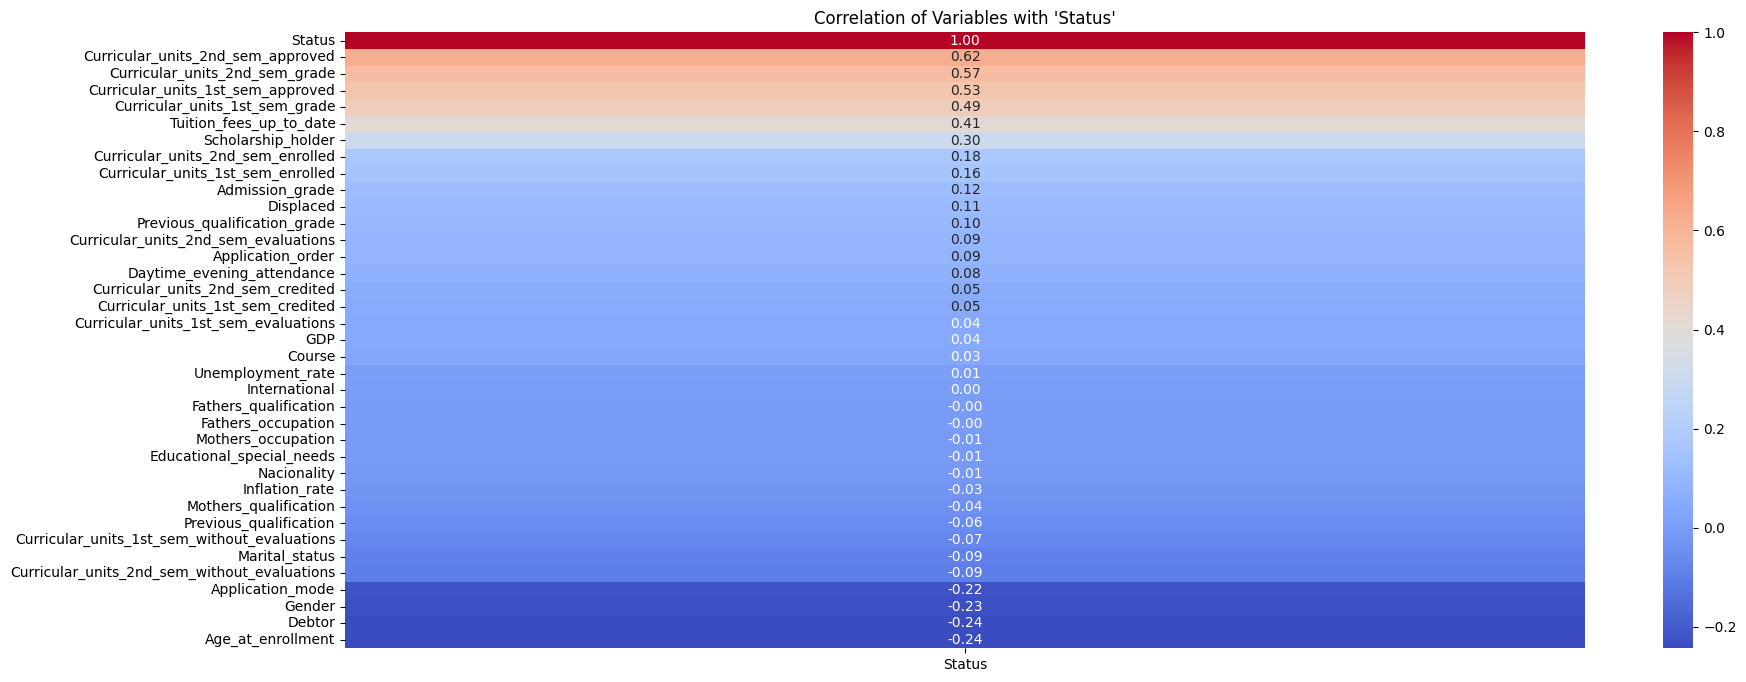

In [21]:
# Korelasi semua variabel terhadap variabel status
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr()[['Status']].sort_values(by='Status', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Variables with 'Status'")
plt.show()

#### EDA Univariate (Analisis Univariat)

<ipython-input-67-23db786bbe03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=data, palette='Set2')


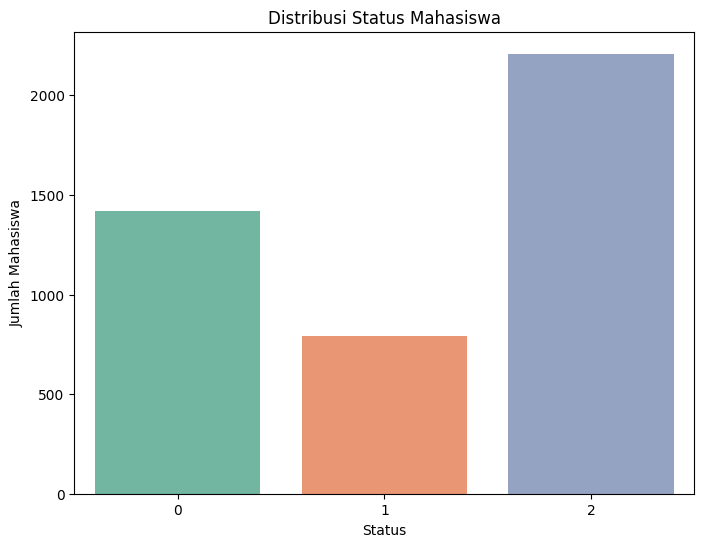

In [67]:
# Melihat distribusi kolom 'status'
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=data, palette='Set2')
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

Graduate = 2
Dropout = 0
Enrolled = 1

<Axes: >

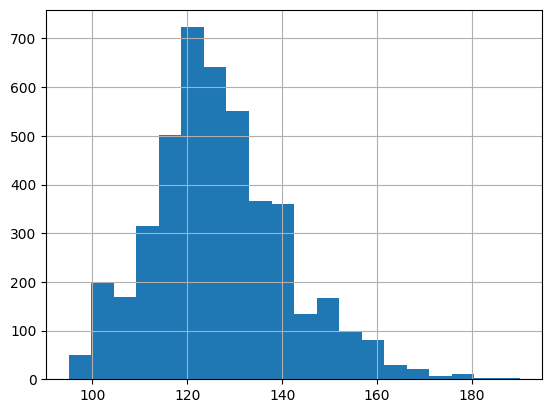

In [78]:
data['Admission_grade'].hist(bins=20)

#### EDA Multivariate (Analisis Multivariat)

Melihat distribusi analisis 5 variabel teratas yang berkorelasi tinggi dengan variabel 'Status'

<ipython-input-76-f0df715a39cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status', y='Curricular_units_2nd_sem_approved', palette='pastel')


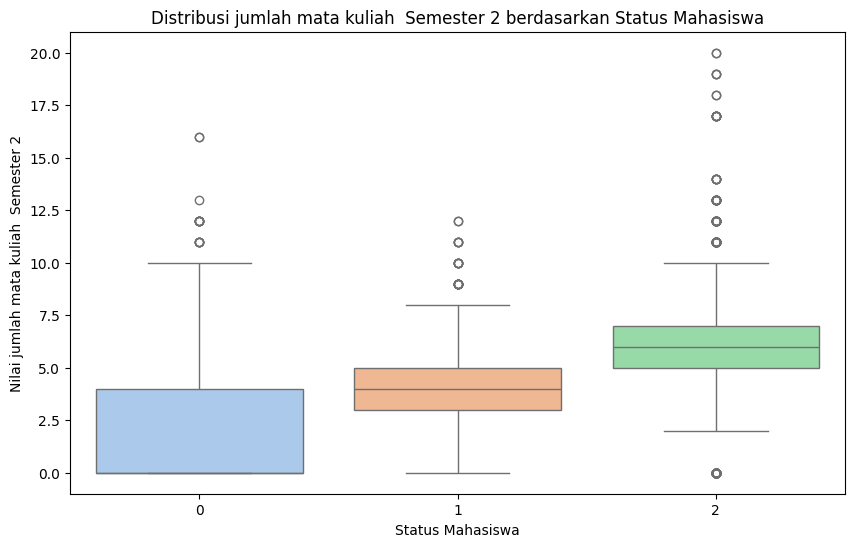

<ipython-input-76-f0df715a39cb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status', y='Curricular_units_2nd_sem_grade', palette='Set2')


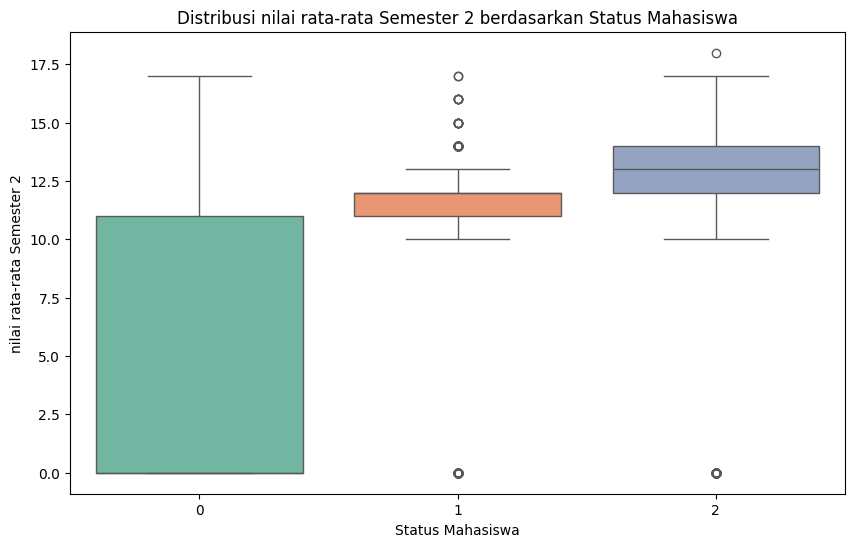

<ipython-input-76-f0df715a39cb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_approved', palette='Set2')


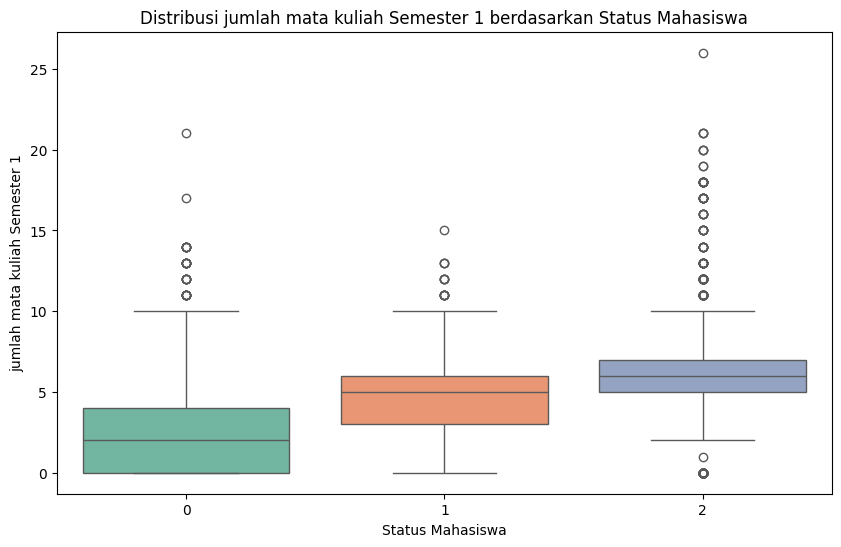

<ipython-input-76-f0df715a39cb>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_grade', palette='Set2')


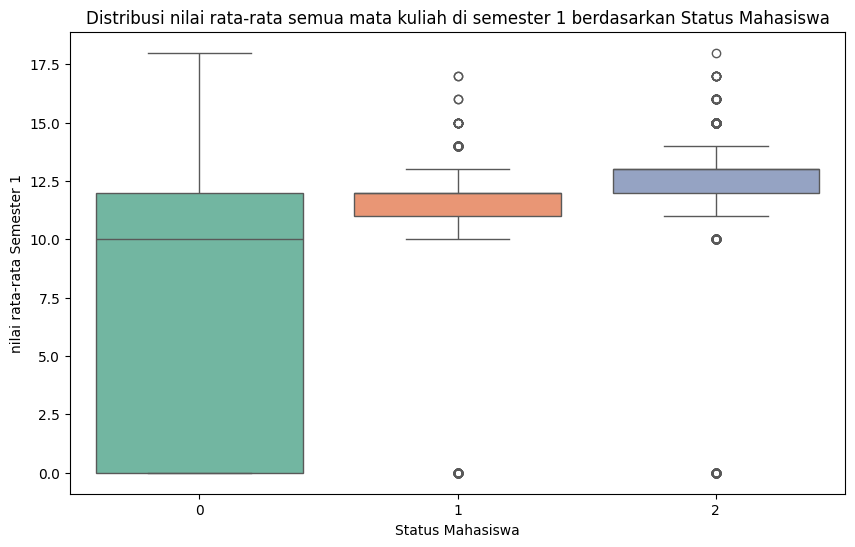

<ipython-input-76-f0df715a39cb>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status', y='Tuition_fees_up_to_date', palette='Set2')


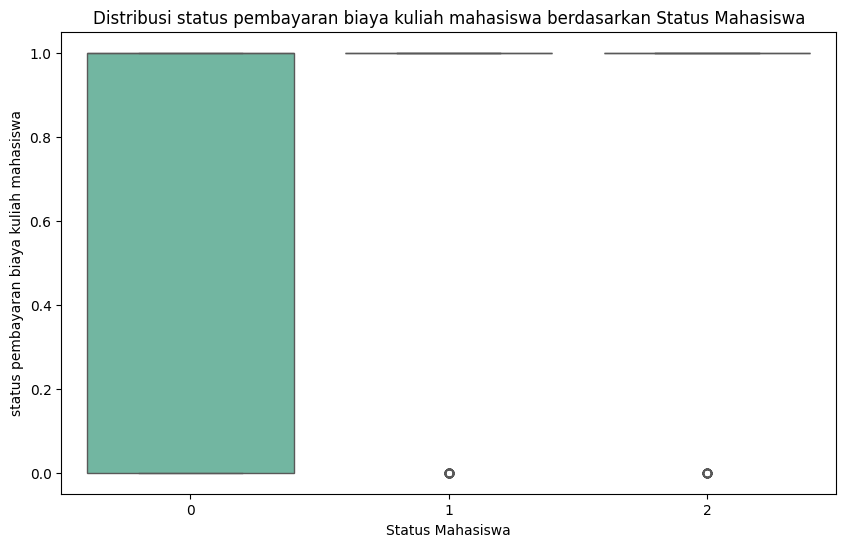

<ipython-input-76-f0df715a39cb>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status', y='Scholarship_holder', palette='Set2')


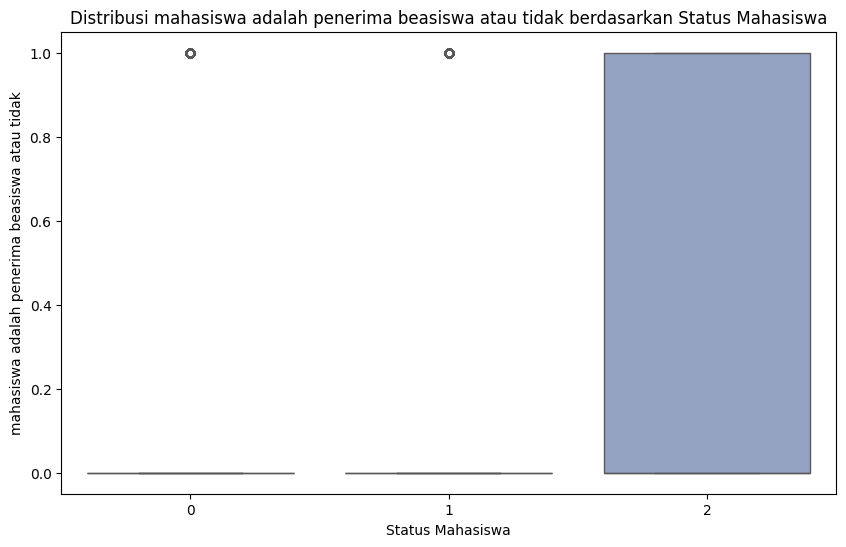

In [76]:
# Visualisasi distribusi nilai jumlah mata kuliah yang berhasil lulus/disetujui di semester 2
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Curricular_units_2nd_sem_approved', palette='pastel')
plt.title('Distribusi jumlah mata kuliah  Semester 2 berdasarkan Status Mahasiswa')
plt.ylabel('Nilai jumlah mata kuliah  Semester 2')
plt.xlabel('Status Mahasiswa')
plt.show()

# Visualisasi distribusi nilai rata-rata yang diperoleh mahasiswa untuk semua mata kuliah di semester 2
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Curricular_units_2nd_sem_grade', palette='Set2')
plt.title('Distribusi nilai rata-rata Semester 2 berdasarkan Status Mahasiswa')
plt.ylabel('nilai rata-rata Semester 2')
plt.xlabel('Status Mahasiswa')
plt.show()

# Visualisasi distribusi nilai jumlah mata kuliah yang berhasil lulus/disetujui di semester 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_approved', palette='Set2')
plt.title('Distribusi jumlah mata kuliah Semester 1 berdasarkan Status Mahasiswa')
plt.ylabel('jumlah mata kuliah Semester 1')
plt.xlabel('Status Mahasiswa')
plt.show()

# Visualisasi distribusi nilai rata-rata semua mata kuliah di semester 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Curricular_units_1st_sem_grade', palette='Set2')
plt.title('Distribusi nilai rata-rata semua mata kuliah di semester 1 berdasarkan Status Mahasiswa')
plt.ylabel('nilai rata-rata Semester 1')
plt.xlabel('Status Mahasiswa')
plt.show()

# Visualisasi distribusi status pembayaran biaya kuliah mahasiswa
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Tuition_fees_up_to_date', palette='Set2')
plt.title('Distribusi status pembayaran biaya kuliah mahasiswa berdasarkan Status Mahasiswa')
plt.ylabel('status pembayaran biaya kuliah mahasiswa')
plt.xlabel('Status Mahasiswa')
plt.show()

# Visualisasi distribusi mahasiswa adalah penerima beasiswa atau tidak
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Scholarship_holder', palette='Set2')
plt.title('Distribusi mahasiswa adalah penerima beasiswa atau tidak berdasarkan Status Mahasiswa')
plt.ylabel('mahasiswa adalah penerima beasiswa atau tidak')
plt.xlabel('Status Mahasiswa')
plt.show()


##### Analisis Tingkat Risiko Dropout Berdasarkan Faktor Ekonomi

In [81]:
# Menghitung rata-rata faktor ekonomi berdasarkan status
economic_factors_mean = data.groupby('Status')[['Unemployment_rate', 'Inflation_rate', 'GDP']].mean()
print("Rata-rata Faktor Ekonomi berdasarkan Status Mahasiswa:")
print(economic_factors_mean)

Rata-rata Faktor Ekonomi berdasarkan Status Mahasiswa:
        Unemployment_rate  Inflation_rate       GDP
Status                                             
0               11.064039        0.977481 -0.274455
1               10.712846        0.921914 -0.152393
2               11.090539        0.889543 -0.087370


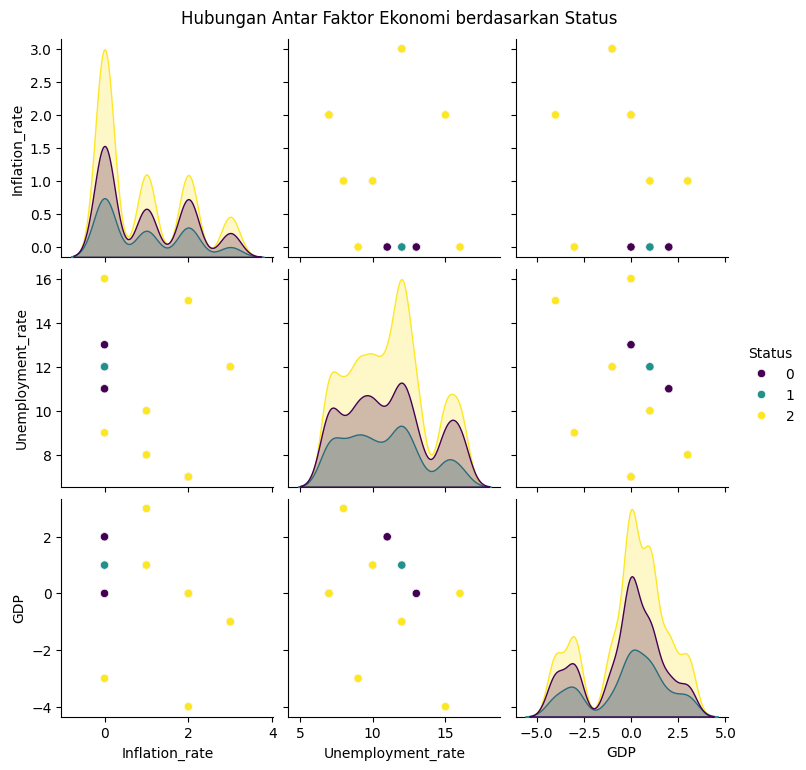

In [87]:
# Scatter plot hubungan Inflasi dan Tingkat Pengangguran berdasarkan status
sns.pairplot(data, vars=['Inflation_rate', 'Unemployment_rate', 'GDP'], hue='Status', palette='viridis', diag_kind='kde')
plt.suptitle("Hubungan Antar Faktor Ekonomi berdasarkan Status", y=1.02)
plt.show()



##### Analisis Rata-rata Status Dropout Berdasarkan Pekerjaan dan Kualifikasi Orang Tua

In [95]:
# Menghitung rata-rata status dropout berdasarkan pekerjaan ibu
dropout_by_mothers_occupation = data.groupby('Mothers_occupation')['Status'].apply(lambda x: (x == 0).mean())  # Changed 'status_numeric' to 'Status'
print("Tingkat Dropout Berdasarkan Pekerjaan Ibu:")
print(dropout_by_mothers_occupation)

# Menghitung rata-rata status dropout berdasarkan pekerjaan ayah
dropout_by_fathers_occupation = data.groupby('Fathers_occupation')['Status'].apply(lambda x: (x == 0).mean())
print("\nTingkat Dropout Berdasarkan Pekerjaan Ayah:")
print(dropout_by_fathers_occupation)

# Menghitung rata-rata status dropout berdasarkan kualifikasi ibu
dropout_by_mothers_qualification = data.groupby('Mothers_qualification')['Status'].apply(lambda x: (x == 0).mean())
print("\nTingkat Dropout Berdasarkan Kualifikasi Ibu:")
print(dropout_by_mothers_qualification)

# Menghitung rata-rata status dropout berdasarkan kualifikasi ayah
dropout_by_fathers_qualification = data.groupby('Fathers_qualification')['Status'].apply(lambda x: (x == 0).mean())
print("\nTingkat Dropout Berdasarkan Kualifikasi Ayah:")
print(dropout_by_fathers_qualification)

Tingkat Dropout Berdasarkan Pekerjaan Ibu:
Mothers_occupation
0      0.687500
1      0.382353
2      0.320755
3      0.270655
4      0.303550
5      0.294340
6      0.285714
7      0.294118
8      0.416667
9      0.310717
10     0.250000
90     0.728571
99     0.764706
122    0.000000
123    0.285714
125    0.000000
131    0.000000
132    0.000000
134    0.250000
141    0.000000
143    0.000000
144    0.000000
151    0.000000
152    0.000000
153    0.000000
171    0.000000
173    0.000000
175    0.200000
191    0.000000
192    0.000000
193    0.250000
194    0.090909
Name: Status, dtype: float64

Tingkat Dropout Berdasarkan Pekerjaan Ayah:
Fathers_occupation
0      0.640625
1      0.358209
2      0.355330
3      0.296875
4      0.360104
5      0.286822
6      0.285124
7      0.276276
8      0.295597
9      0.319802
10     0.319549
90     0.707692
99     0.684211
101    0.000000
102    0.000000
103    0.250000
112    0.500000
114    0.000000
121    0.000000
122    0.000000
123    0.0000

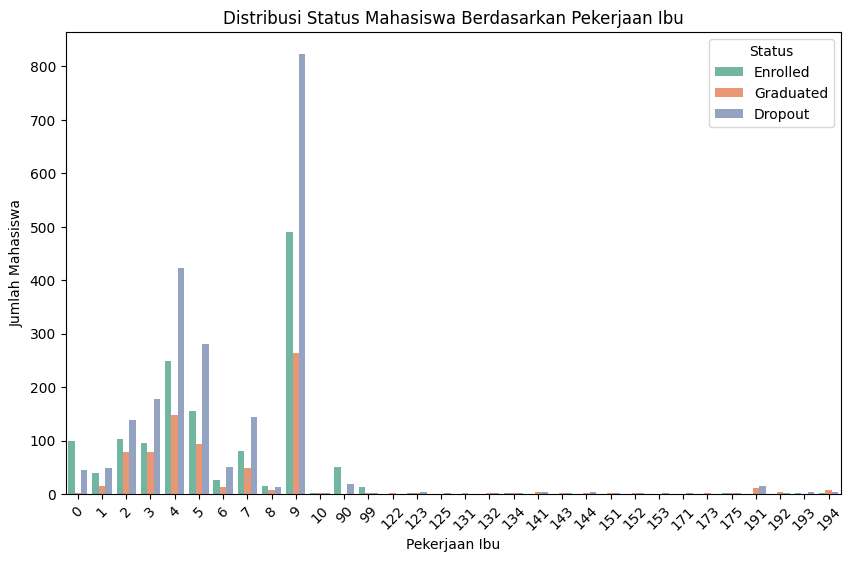

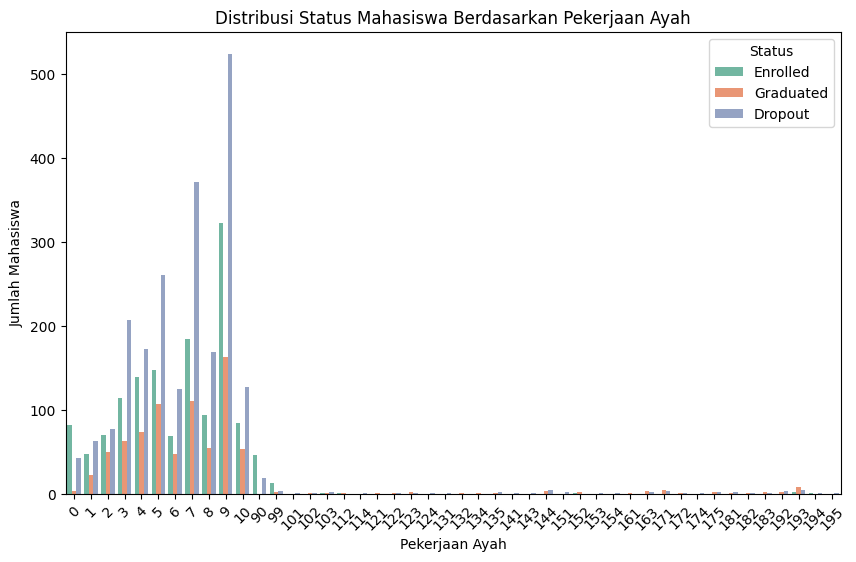

In [96]:
# Latar Belakang Keluarga
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Mothers_occupation', hue='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa Berdasarkan Pekerjaan Ibu')
plt.xlabel('Pekerjaan Ibu')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status', labels=['Enrolled', 'Graduated', 'Dropout'])
plt.xticks(rotation=45)
plt.show()

# Visualisasi distribusi status berdasarkan pekerjaan ayah
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Fathers_occupation', hue='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa Berdasarkan Pekerjaan Ayah')
plt.xlabel('Pekerjaan Ayah')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status', labels=['Enrolled', 'Graduated', 'Dropout'])
plt.xticks(rotation=45)
plt.show()



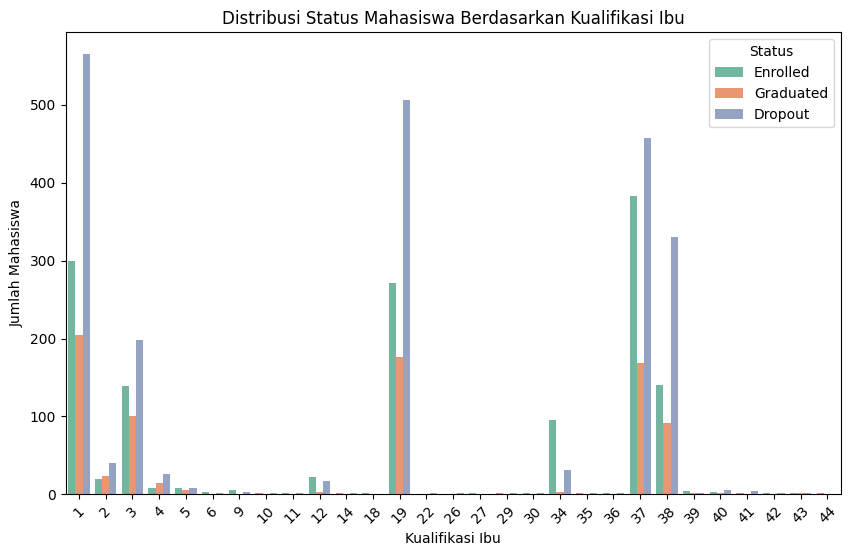

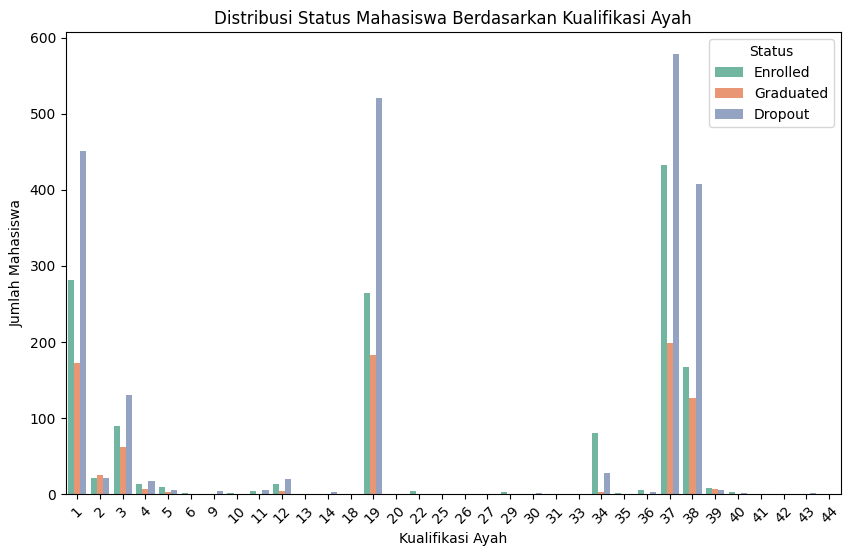

In [97]:
# Visualisasi distribusi status berdasarkan kualifikasi ibu
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Mothers_qualification', hue='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa Berdasarkan Kualifikasi Ibu')
plt.xlabel('Kualifikasi Ibu')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status', labels=['Enrolled', 'Graduated', 'Dropout'])
plt.xticks(rotation=45)
plt.show()

# Visualisasi distribusi status berdasarkan kualifikasi ayah
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Fathers_qualification', hue='Status', palette='Set2')
plt.title('Distribusi Status Mahasiswa Berdasarkan Kualifikasi Ayah')
plt.xlabel('Kualifikasi Ayah')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status', labels=['Enrolled', 'Graduated', 'Dropout'])
plt.xticks(rotation=45)
plt.show()

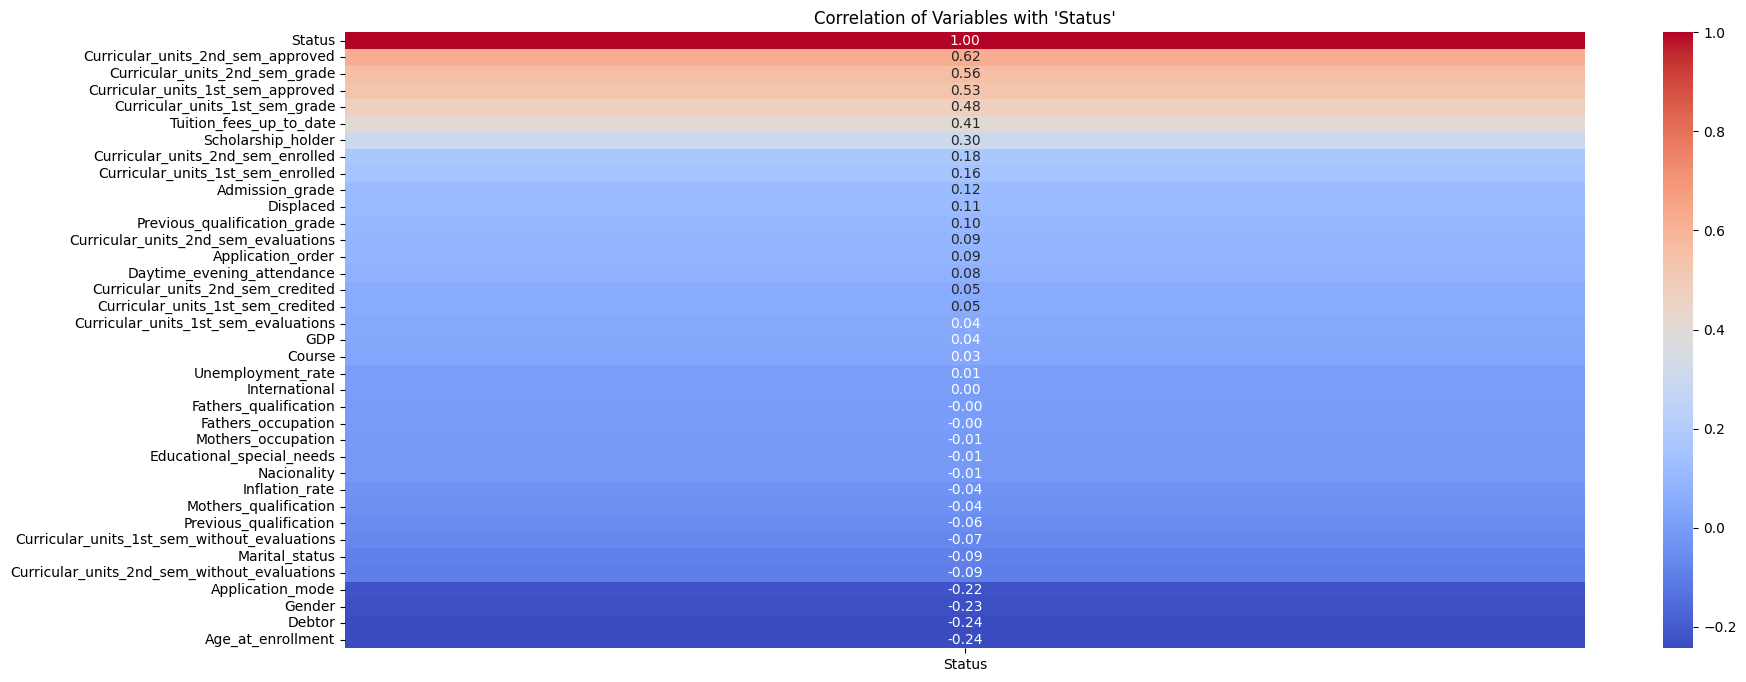

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr()[['Status']].sort_values(by='Status', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Variables with 'Status'")
plt.show()

#### Pembagian Data

In [30]:
data.shape

(4424, 37)

In [31]:
# Pembagian data dengan rasio 80:20
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

# Reset indeks untuk menjaga konsistensi
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Cetak ukuran data hasil pembagian
print("Ukuran data latih:", train_df.shape)
print("Ukuran data uji:", test_df.shape)

Ukuran data latih: (3539, 37)
Ukuran data uji: (885, 37)


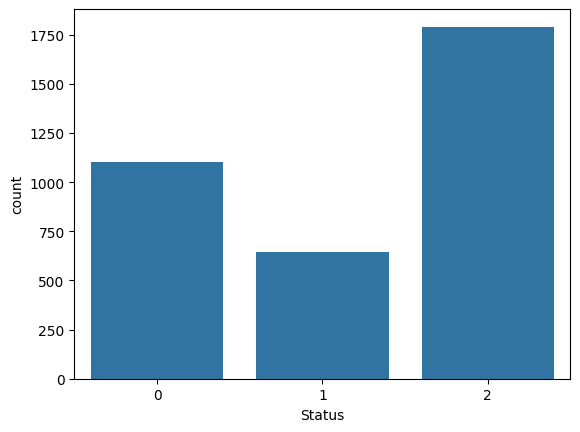

In [32]:
sns.countplot(data=train_df, x="Status")
plt.show()

- Graduate 2
- Dropout 0
- Enrolled 1

Pada visualisasi data di atas, terlihat bahwa data latih yang kita miliki didominasi oleh kategori “Graduate”

In [33]:
train_df.Status.value_counts()

,count
Status,
2,1791
0,1105
1,643


### Undersampler

In [44]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [40]:
class_2 = train_df[(train_df.Status == 2)]
class_0 = train_df[(train_df.Status == 0)]
class_1 = train_df[(train_df.Status == 1)]

In [42]:
df_class_2_undersampled = resample(class_2, n_samples=643, random_state=32)
df_class_0_undersampled = resample(class_0, n_samples=643, random_state=32)
print(df_class_2_undersampled.shape)
print(df_class_0_undersampled.shape)

(643, 37)
(643, 37)


In [45]:
undersampled_train_df = pd.concat([class_1, df_class_2_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_class_0_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
1658,1,1,1,9853,1,1,-0.046510,1,2,19,...,0,6,8,5,0.224519,0,-0.813253,-1.466871,-1.375511,1
207,2,39,1,9085,1,19,0.036907,1,38,38,...,0,6,0,0,-1.963489,0,0.425695,1.787974,-0.749872,0
503,1,1,1,9500,1,1,0.408490,1,19,37,...,0,7,7,6,0.665959,0,-1.489043,0.992345,0.140122,2
216,1,51,1,9670,1,1,0.256823,1,19,19,...,0,5,6,4,0.003799,0,-0.813253,-1.466871,-1.375511,0
1073,1,1,1,9130,1,1,-0.956508,1,19,37,...,0,5,5,0,-1.963489,0,0.425695,1.787974,-0.749872,0


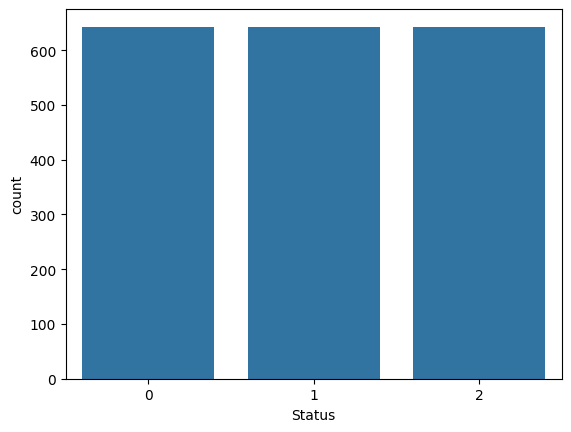

In [46]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

In [47]:
X_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

## Modeling

### Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    #'max_features': [None, 'sqrt', 'log2'],  # Menghapus 'auto'
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8]})

In [58]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8}


In [60]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    #max_features='None'
)

tree_model.fit(X_train, y_train)
joblib.dump(tree_model, "/content/sample_data/model/tree_model.joblib")

['/content/sample_data/model/tree_model.joblib']

In [61]:
y_pred = tree_model.predict(X_test)


In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


### Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'n_estimators': [200, 500]})

In [65]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 200}


In [67]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=200,
    max_features='sqrt',
    criterion='entropy',
    n_jobs=-1
)
rdf_model.fit(X_train, y_train)
joblib.dump(rdf_model, "/content/sample_data/model/rdf_model.joblib")

['/content/sample_data/model/rdf_model.joblib']

In [68]:
y_pred_rdf = rdf_model.predict(X_test)
accuracy_rdf = accuracy_score(y_test, y_pred_rdf)
print(f"Accuracy: {accuracy_rdf:.2f}")

Accuracy: 0.72


### Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [70]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [71]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.01,
    max_depth=8,
    max_features='sqrt',
    n_estimators=300
)
gboost_model.fit(X_train, y_train)
joblib.dump(gboost_model, "/content/sample_data/model/gboost_model.joblib")

['/content/sample_data/model/gboost_model.joblib']

In [72]:
y_pred_gboost = gboost_model.predict(X_test)
accuracy_gboost = accuracy_score(y_test, y_pred_gboost)
print(f"Accuracy: {accuracy_gboost:.2f}")

Accuracy: 0.73


## Evaluation

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

**Decision Tree**

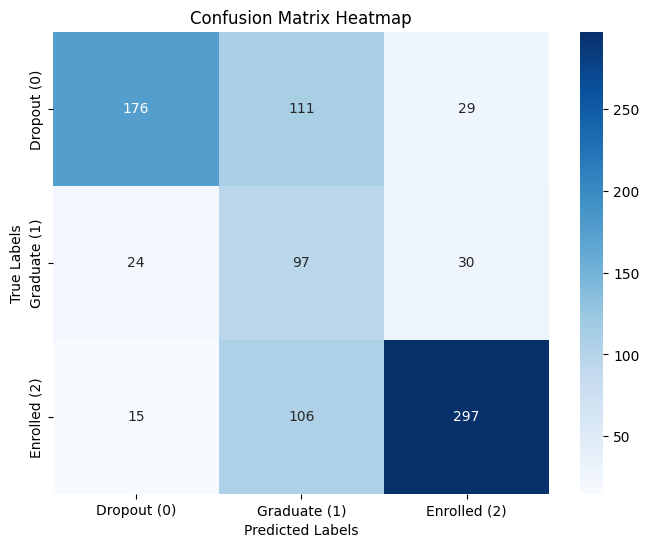


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.56      0.66       316
           1       0.31      0.64      0.42       151
           2       0.83      0.71      0.77       418

    accuracy                           0.64       885
   macro avg       0.65      0.64      0.62       885
weighted avg       0.74      0.64      0.67       885



In [81]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'],
            yticklabels=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report y_pred_rdf = rdf_model.predict(X_test)
print("\nClassification Report:")
class_report = classification_report(y_test, y_pred)
print(class_report)

**Random Forest**

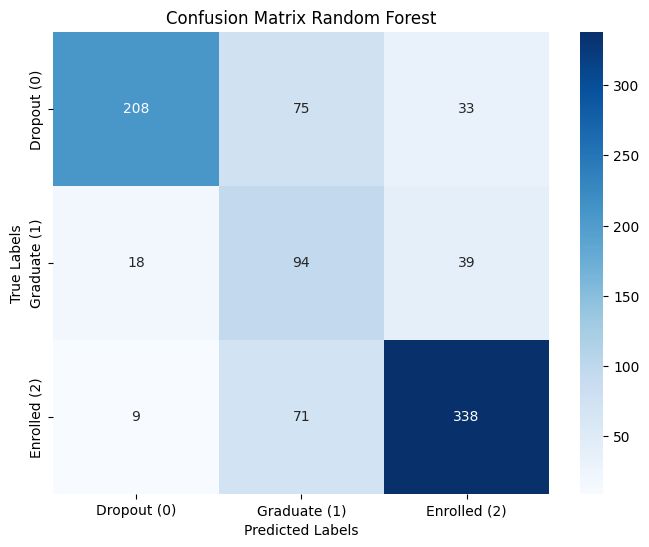


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.75       316
           1       0.39      0.62      0.48       151
           2       0.82      0.81      0.82       418

    accuracy                           0.72       885
   macro avg       0.70      0.70      0.68       885
weighted avg       0.77      0.72      0.74       885



In [82]:
# Confusion Matrix
conf_matrix_rdf = confusion_matrix(y_test, y_pred_rdf)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rdf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'],
            yticklabels=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'])
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("\nClassification Report:")
class_report_rdf = classification_report(y_test, y_pred_rdf)
print(class_report_rdf)

**Gradient Boosting**

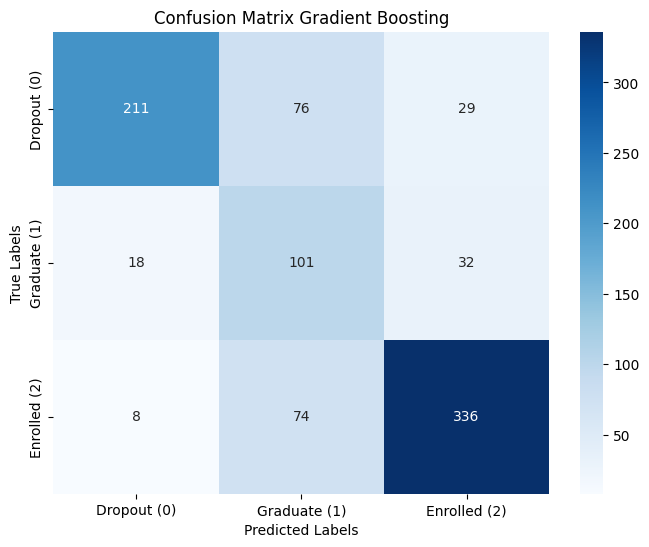


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.76       316
           1       0.40      0.67      0.50       151
           2       0.85      0.80      0.82       418

    accuracy                           0.73       885
   macro avg       0.71      0.71      0.70       885
weighted avg       0.79      0.73      0.75       885



In [83]:
# Confusion Matrix
conf_matrix_gboost = confusion_matrix(y_test, y_pred_gboost)

# Visualisasi Confusion Matrix dengan Heatmap y_pred_gboost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gboost, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'],
            yticklabels=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'])
plt.title("Confusion Matrix Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("\nClassification Report:")
class_report_gboost = classification_report(y_test, y_pred_gboost)
print(class_report_gboost)

**feature importance**

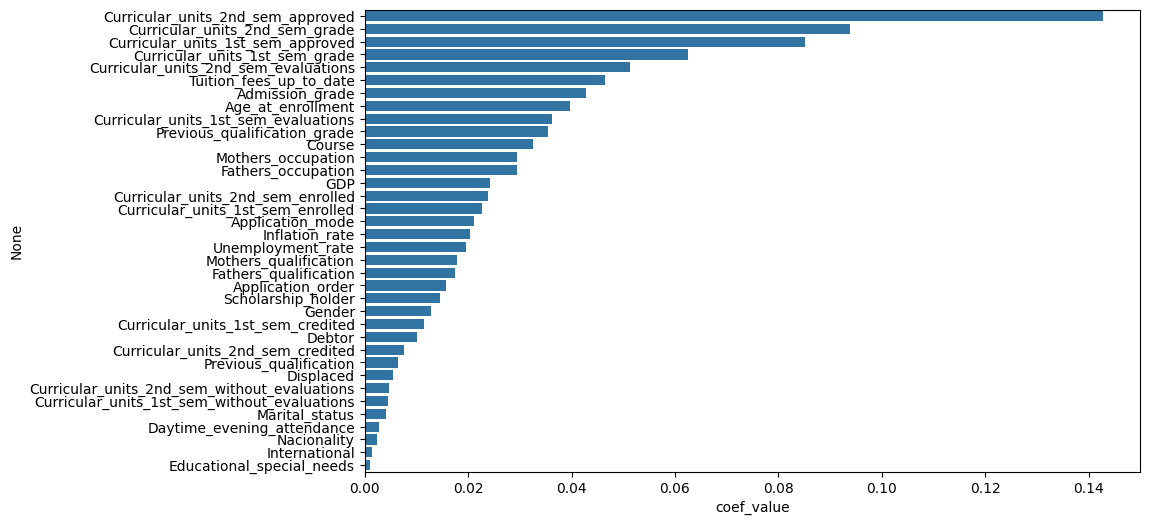

,coef_value
Curricular_units_2nd_sem_approved,0.142709
Curricular_units_2nd_sem_grade,0.093934
Curricular_units_1st_sem_approved,0.085097
Curricular_units_1st_sem_grade,0.062509
Curricular_units_2nd_sem_evaluations,0.051367
Tuition_fees_up_to_date,0.046379
Admission_grade,0.042869
Age_at_enrollment,0.039677
Curricular_units_1st_sem_evaluations,0.036247
Previous_qualification_grade,0.035470


In [84]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, X_train.columns)